In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
print(os.getcwd())

c:\Users\user\Desktop\KIFIYA Projects\TellCo-Week-02\notebooks


In [ ]:
import psycopg2
# Load environment variables from the .env file
load_dotenv()
 # Retrieve the environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
# # Construct the connection string
connection_string = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
# Create the engine
engine = create_engine(connection_string)

In [3]:
# Check whether the data fetched or not

query = """
SELECT * FROM xdr_data; """
data = pd.read_sql_query(query, engine)

print(data.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


# Task 3.1. Replace missing values and outliers

In [40]:
import sys
sys.path.append(r'C:\Users\user\Desktop\KIFIYA Projects\TellCo-Week-02\scripts')

# Import experience_analytics modules
from experience_analytics import (
    replace_missing_values_and_outliers,
    aggregate_per_customer,
    get_top_values,
    get_bottom_values,
    get_most_frequent_values,
    distribution_per_handset_type,
    extract_experience_metrics
)

In [41]:
replace_missing_values_and_outliers(data)
customer_data = aggregate_per_customer(data)
customer_data.head()

,IMSI,avg_tcp_retransmission,avg_rtt,Handset Type,avg_throughput
0,2.040471e+14,2.156957e+07,127.458589,Quectel Wireless. Quectel Ec21-E,2.0
1,2.040808e+14,2.156957e+07,127.458589,Quectel Wireless. Quectel Ec25-E,1.0
2,2.082001e+14,7.623557e+05,88.911263,Dn Electronics Danew Konnect 350,109.0
3,2.082001e+14,2.797900e+04,84.000000,Samsung Galaxy Grand (Gt-I9060X),754.0
4,2.082001e+14,2.156957e+07,92.000000,Apple iPhone 6S (A1688),80.5


# Task 3.2. Top, Bottom, and most frequent values

In [42]:
# TCP DL Retransmission Values
top_tcp_dl = get_top_values(data, "TCP DL Retrans. Vol (Bytes)")
top_tcp_dl

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),avg_tcp_retransmission,avg_rtt,avg_throughput
75983,1.304243e+19,4/26/2019 22:57,351.0,4/28/2019 0:39,896.0,92525.0,2.082010e+14,3.365926e+10,8.654080e+13,T76677A,...,21666846.0,375332804.0,10656393.0,315061784.0,84816.0,44087080.0,408922811.0,4.219122e+07,86.000000,31817.428647
39370,7.277826e+18,4/25/2019 3:24,830.0,4/26/2019 3:24,744.0,86399.0,2.082014e+14,3.376213e+10,8.637690e+13,L87871A,...,13963968.0,342233128.0,2827754.0,432765385.0,9386652.0,32807455.0,375196713.0,4.260914e+07,112.000000,15936.045927
71089,7.277826e+18,4/26/2019 8:25,872.0,4/27/2019 1:16,669.0,60661.0,2.082015e+14,3.365001e+10,3.538061e+13,D10026C,...,21952671.0,662159014.0,12052945.0,278798603.0,13127744.0,57130967.0,707812814.0,4.216876e+07,56.000000,11826.358144
145730,1.304243e+19,4/29/2019 6:19,469.0,4/30/2019 6:19,394.0,86399.0,2.082003e+14,3.378373e+10,3.556251e+13,T37571A,...,12134504.0,110237837.0,5827996.0,439358100.0,3048631.0,38183506.0,141427361.0,4.247944e+07,72.000000,5859.425721
17149,6.917538e+18,4/24/2019 19:23,835.0,4/24/2019 23:53,165.0,16178.0,2.082015e+14,3.376076e+10,3.594011e+13,C70629A,...,4567772.0,487928332.0,78353.0,88508111.0,12823060.0,21691543.0,512703841.0,4.292722e+07,93.411792,4845.000000
136790,1.304243e+19,4/29/2019 1:16,379.0,4/30/2019 1:16,291.0,86399.0,2.082018e+14,3.376354e+10,8.637690e+13,D79108A,...,6775676.0,799712552.0,13028759.0,105139050.0,14649276.0,40971152.0,832472811.0,4.219258e+07,131.425087,29797.000000
78362,7.277826e+18,4/27/2019 3:38,446.0,4/28/2019 3:38,407.0,86399.0,2.082018e+14,3.366413e+10,8.637690e+13,T84755A,...,14880715.0,272061838.0,1934199.0,70111558.0,759017.0,35979701.0,311692632.0,4.233735e+07,187.000000,26981.038686
98860,1.304243e+19,4/27/2019 17:13,625.0,4/28/2019 0:02,379.0,24527.0,2.082017e+14,3.361921e+10,3.534681e+13,D11492C,...,5614930.0,197805992.0,13124568.0,227119262.0,14981494.0,36608843.0,225139316.0,4.218760e+07,104.000000,4789.425721
77749,1.304243e+19,4/27/2019 2:36,295.0,4/28/2019 2:36,274.0,86399.0,2.082019e+14,3.366033e+10,8.637690e+13,T70870B,...,8189589.0,226677682.0,10413497.0,798340224.0,13069438.0,42940062.0,277012319.0,4.260006e+07,174.000000,36119.502670
148575,6.917538e+18,4/29/2019 7:11,780.0,4/30/2019 7:11,707.0,86399.0,2.082017e+14,3.366272e+10,3.533161e+13,8.12221622196178E+016,...,2377562.0,567411702.0,1906195.0,148973856.0,12341771.0,38935672.0,602373665.0,4.212336e+07,78.911263,11292.000000


In [43]:
# Top TCP UL Retransmission Values
top_tcp_ul = get_top_values (data, "TCP UL Retrans. Vol (Bytes)")
top_tcp_ul

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),avg_tcp_retransmission,avg_rtt,avg_throughput
78319,1.304243e+19,4/27/2019 3:33,59.0,4/28/2019 3:33,988.0,86399.0,2.082018e+14,3.366782e+10,8.637690e+13,T72166A,...,16739170.0,447947653.0,8985748.0,225089129.0,3962760.0,33189746.0,459151519.0,5.535077e+06,99.000000,39648.190428
122630,7.277826e+18,4/28/2019 5:00,552.0,4/29/2019 5:00,556.0,86400.0,2.082017e+14,3.366051e+10,8.637690e+13,D87789A,...,2972023.0,376075339.0,11167965.0,243419004.0,1301826.0,16821540.0,427095764.0,1.710923e+07,75.000000,32748.425721
58618,1.304243e+19,4/26/2019 0:32,110.0,4/27/2019 0:32,50.0,86399.0,2.082010e+14,3.366141e+10,8.654080e+13,T89132A,...,11441142.0,607853126.0,4982855.0,698310266.0,13187454.0,47018213.0,639431455.0,1.566510e+07,92.000000,3950.000000
2956,1.304243e+19,4/24/2019 3:16,318.0,4/25/2019 3:16,325.0,86400.0,2.082017e+14,3.369990e+10,8.637690e+13,T88753A,...,7541488.0,153077573.0,7028288.0,637112435.0,633255.0,20988422.0,194931629.0,3.635906e+07,194.000000,29818.190428
47387,NaN,4/25/2019 7:25,175.0,4/26/2019 7:25,673.0,86391.0,NaN,NaN,NaN,None,...,8997984.0,459044283.0,263323.0,726136289.0,1438198.0,18593440.0,471881951.0,1.394860e+07,139.000000,32513.000000
120490,1.304243e+19,4/28/2019 3:42,771.0,4/29/2019 3:42,701.0,86399.0,2.082014e+14,3.366383e+10,8.637690e+13,D78943B,...,19795382.0,432975476.0,6714397.0,52552016.0,3789366.0,53912768.0,459755367.0,4.070369e+06,118.921386,28141.425721
24942,1.304243e+19,4/24/2019 21:03,140.0,4/25/2019 1:16,303.0,15161.0,2.082003e+14,3.360448e+10,3.560841e+13,D78073B,...,20420636.0,539305935.0,14837821.0,194804528.0,3932143.0,49978493.0,556682690.0,2.845611e+06,51.000000,11793.574567
37204,1.304243e+19,4/25/2019 2:11,90.0,4/26/2019 2:11,26.0,86399.0,2.082019e+14,3.366016e+10,8.637690e+13,D21329A,...,17742619.0,420431860.0,3030448.0,54545408.0,847784.0,42211640.0,440604037.0,3.801535e+06,102.911263,18366.000000
45800,7.349883e+18,4/25/2019 7:00,390.0,4/26/2019 8:54,524.0,93248.0,2.082018e+14,3.365851e+10,8.674220e+13,9.16456701171738E+015,...,6068914.0,395811678.0,14642767.0,808368183.0,4818975.0,41282788.0,405895805.0,1.565751e+07,167.000000,36375.428647
36282,7.277826e+18,4/25/2019 1:37,258.0,4/26/2019 1:37,159.0,86399.0,2.082015e+14,3.366551e+10,8.637690e+13,T92821C,...,18182981.0,148878574.0,8737339.0,555680344.0,6510347.0,39062279.0,179728083.0,1.709867e+07,77.000000,10138.420866


In [44]:
# Bottom TCP DL Retransmission Values
bottom_tcp_dl = get_bottom_values(data, "TCP DL Retrans. Vol (Bytes)")
bottom_tcp_dl

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),avg_tcp_retransmission,avg_rtt,avg_throughput
59717,7.277826e+18,4/26/2019 2:31,567.0,4/27/2019 2:45,347.0,87229.0,2.082095e+14,3.366454e+10,8.616400e+13,D44028A,...,10874137.0,193763495.0,7874219.0,757318152.0,156926.0,29631741.0,213513814.0,21559.000000,76.911263,183.0
125094,7.277826e+18,4/23/2019 3:51,410.0,4/30/2019 3:51,357.0,604799.0,2.082095e+14,3.376154e+10,8.616400e+13,D37790C,...,558847.0,204061868.0,16278138.0,803642617.0,4898738.0,45336551.0,240049125.0,759660.664811,32.000000,203.0
2850,7.277826e+18,4/24/2019 3:06,504.0,4/25/2019 3:11,342.0,86689.0,2.082095e+14,3.369906e+10,8.616400e+13,D21229C,...,5825296.0,322431014.0,6042452.0,130623399.0,894967.0,26338485.0,362602084.0,759662.664811,45.000000,159.0
39610,7.277826e+18,4/25/2019 3:32,495.0,4/26/2019 3:47,114.0,87310.0,2.082095e+14,3.376154e+10,8.616400e+13,L51071B,...,5426622.0,270706850.0,15985263.0,369200157.0,12504276.0,38017754.0,322014832.0,1322.000000,64.000000,66.0
52488,7.277826e+18,4/25/2019 6:45,30.0,4/27/2019 9:59,149.0,184413.0,2.082095e+14,3.376394e+10,8.616400e+13,D30240B,...,9938472.0,401441581.0,2000264.0,489007003.0,1540571.0,34774757.0,446605999.0,95468.000000,46.000000,186.0
60376,6.917538e+18,4/26/2019 3:25,103.0,4/27/2019 3:35,182.0,86981.0,2.082095e+14,3.369900e+10,8.616400e+13,G24110A,...,200277.0,152589307.0,4455130.0,277352252.0,2918451.0,11754358.0,171732287.0,759662.664811,88.411792,62.0
60426,7.277826e+18,4/26/2019 3:31,784.0,4/27/2019 4:11,816.0,88825.0,2.082095e+14,3.376399e+10,8.616400e+13,D14803C,...,3285429.0,67703133.0,3493627.0,785292596.0,15931911.0,36724100.0,86171336.0,77766.000000,23.000000,199.0
75093,7.277826e+18,4/24/2019 3:22,793.0,4/28/2019 5:35,385.0,353569.0,2.082095e+14,3.376151e+10,8.616400e+13,T87706B,...,8186932.0,127734304.0,802980.0,48043460.0,11227315.0,37921671.0,182777643.0,759662.664811,44.000000,177.0
100314,7.277826e+18,4/25/2019 3:07,906.0,4/29/2019 12:43,731.0,380157.0,2.082095e+14,3.366933e+10,8.616400e+13,T76487A,...,14930216.0,350449220.0,5383884.0,187618128.0,10240467.0,35520481.0,400129496.0,5300.000000,37.000000,251.0
143429,7.277826e+18,4/29/2019 4:55,309.0,4/30/2019 4:59,135.0,86633.0,2.082095e+14,3.376162e+10,8.616400e+13,T71098C,...,11380894.0,78014361.0,13925645.0,559814214.0,4928203.0,40575736.0,88263735.0,759662.664811,54.000000,187.0


In [45]:
# Bottom TCP UL Retransmission Values
bottom_tcp_ul = get_bottom_values(data, "TCP UL Retrans. Vol (Bytes)")
bottom_tcp_ul

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),avg_tcp_retransmission,avg_rtt,avg_throughput
13275,1.304243e+19,4/24/2019 18:15,217.0,4/25/2019 0:24,936.0,22162.0,2.082003e+14,3.364280e+10,8.650410e+13,L92702A,...,19833198.0,709476216.0,208100.0,256589867.0,6946332.0,31853141.0,743838742.0,1.036320e+05,140.921386,40970.000000
15253,7.349883e+18,4/24/2019 18:51,206.0,4/25/2019 3:23,721.0,30697.0,2.082015e+14,3.366809e+10,8.687670e+13,D88162B,...,5221868.0,782514504.0,10640787.0,577543801.0,6663357.0,31227869.0,826147398.0,1.129280e+05,45.000000,15431.000000
36086,1.304243e+19,4/25/2019 1:30,388.0,4/26/2019 1:30,456.0,86400.0,2.082017e+14,3.376207e+10,8.637690e+13,T21399B,...,2156105.0,577976441.0,566403.0,10097395.0,4536360.0,11374406.0,595150395.0,2.542600e+04,67.000000,22641.000000
38407,1.304243e+19,4/25/2019 2:50,959.0,4/26/2019 10:20,516.0,113349.0,2.082019e+14,3.366574e+10,8.637690e+13,D35282B,...,17510892.0,374594241.0,6019359.0,279928276.0,8790469.0,42878478.0,398833781.0,9.311000e+03,75.000000,18691.190428
75087,1.304243e+19,4/24/2019 1:56,67.0,4/28/2019 4:03,518.0,353253.0,2.082018e+14,3.366567e+10,8.637690e+13,T92734B,...,2058619.0,408642147.0,6704601.0,616467085.0,10647041.0,33485121.0,445233809.0,8.002000e+03,81.000000,26367.000000
78703,1.304243e+19,4/27/2019 4:34,203.0,4/28/2019 4:34,136.0,86399.0,2.082014e+14,3.376319e+10,8.637690e+13,D33038C,...,6191774.0,663163614.0,14114827.0,453367676.0,2524578.0,40214348.0,686918582.0,1.413125e+07,83.000000,48858.000000
90223,1.304243e+19,4/27/2019 14:18,410.0,4/28/2019 2:43,978.0,44706.0,2.082003e+14,3.378259e+10,3.549511e+13,D92737C,...,15023953.0,366978889.0,5565193.0,477403163.0,7539543.0,52074538.0,412586939.0,7.505984e+06,69.000000,13847.319458
124053,1.304243e+19,4/28/2019 5:53,601.0,4/29/2019 5:53,571.0,86399.0,2.082017e+14,3.365855e+10,8.637690e+13,D78943B,...,9451430.0,661528842.0,12602918.0,363923067.0,15295690.0,58233368.0,689488118.0,2.563590e+05,60.000000,43905.000000
138837,1.304243e+19,4/29/2019 2:31,182.0,4/30/2019 2:31,58.0,86399.0,2.082017e+14,3.369990e+10,8.637690e+13,D88782A,...,463609.0,378934779.0,5207063.0,175834017.0,15112739.0,43999535.0,406158698.0,4.114072e+07,99.627571,11059.552057
139021,1.304243e+19,4/29/2019 2:39,489.0,4/30/2019 2:39,398.0,86399.0,2.082017e+14,3.365834e+10,8.637690e+13,D72312C,...,234186.0,3282787.0,8694714.0,372023976.0,9799260.0,38144402.0,36066906.0,2.175971e+06,103.000000,30795.038686


In [46]:
# Most Frequent TCP DL Retransmission Values
most_freq_tcp_dl = get_most_frequent_values(data, "TCP DL Retrans. Vol (Bytes)")
most_freq_tcp_dl

,TCP DL Retrans. Vol (Bytes),count
0,2.080991e+07,88562
1,1.557372e+07,1271
2,1.413125e+07,1058
3,1.330000e+03,433
4,2.660000e+03,219
5,3.800000e+01,200
6,9.200000e+01,192
7,1.318000e+03,156
8,1.381192e+07,153
9,5.430000e+02,133


In [47]:
# Most Frequent TCP UL Retransmission Values
most_freq_tcp_ul = get_most_frequent_values(data, "TCP UL Retrans. Vol (Bytes)")
most_freq_tcp_ul

,TCP UL Retrans. Vol (Bytes),count
0,759658.664811,96704
1,1330.000000,1910
2,2660.000000,937
3,539399.682195,822
4,1294.000000,651
5,3990.000000,548
6,1318.000000,545
7,598522.237871,513
8,5320.000000,366
9,6650.000000,271


# Task 3.3 - Distribution and Interpretation

In [48]:
throughput_per_handset = distribution_per_handset_type(data, "Avg Bearer TP DL (kbps)")
print("Throughput per Handset Type")
throughput_per_handset

Throughput per Handset Type


,Handset Type,Avg Bearer TP DL (kbps)
0,A-Link Telecom I. Cubot A5,23184.000000
1,A-Link Telecom I. Cubot Note Plus,6527.000000
2,A-Link Telecom I. Cubot Note S,8515.000000
3,A-Link Telecom I. Cubot Nova,9105.552057
4,A-Link Telecom I. Cubot Power,11315.319458
...,...,...
1391,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,44.500000
1392,Zyxel Communicat. Lte7460,39741.000000
1393,Zyxel Communicat. Sbg3600,11315.319458
1394,Zyxel Communicat. Zyxel Wah7706,1263.000000


In [49]:
tcp_retrans_per_handset = distribution_per_handset_type(data, "TCP DL Retrans. Vol (Bytes)")
print ("TCP Retransmission per Handset Type")
tcp_retrans_per_handset

TCP Retransmission per Handset Type


,Handset Type,TCP DL Retrans. Vol (Bytes)
0,A-Link Telecom I. Cubot A5,2.080991e+07
1,A-Link Telecom I. Cubot Note Plus,6.023490e+05
2,A-Link Telecom I. Cubot Note S,4.134448e+07
3,A-Link Telecom I. Cubot Nova,1.358400e+05
4,A-Link Telecom I. Cubot Power,7.799000e+03
...,...,...
1391,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,1.040629e+07
1392,Zyxel Communicat. Lte7460,2.384303e+07
1393,Zyxel Communicat. Sbg3600,1.413125e+07
1394,Zyxel Communicat. Zyxel Wah7706,1.160000e+02


# Task 3.4 - K-Means Clustering

In [50]:
experience_metrics = extract_experience_metrics(data)
experience_metrics

,IMSI,avg_tcp_retransmission,avg_rtt,avg_throughput
0,2.040471e+14,2.156957e+07,127.458589,2.0
1,2.040808e+14,2.156957e+07,127.458589,1.0
2,2.082001e+14,7.623557e+05,88.911263,109.0
3,2.082001e+14,2.797900e+04,84.000000,754.0
4,2.082001e+14,2.156957e+07,92.000000,80.5
...,...,...,...,...
107260,2.082099e+14,2.156957e+07,127.458589,15.0
107261,2.082099e+14,2.156957e+07,127.458589,15.0
107262,2.082099e+14,7.967047e+05,47.000000,878.0
107263,2.082522e+14,2.156957e+07,127.458589,2.0


In [51]:
# Perform K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
experience_metrics['cluster'] = kmeans.fit_predict(experience_metrics[['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']])

# Description of Each Cluster
cluster_description = experience_metrics.groupby('cluster').mean()
cluster_description

,IMSI,avg_tcp_retransmission,avg_rtt,avg_throughput
cluster,,,,
0,2.082016e+14,2.160747e+07,72.336193,1363.444290
1,2.082016e+14,1.235094e+06,75.317503,16851.890812
2,2.082016e+14,1.171472e+07,73.668863,12707.123444


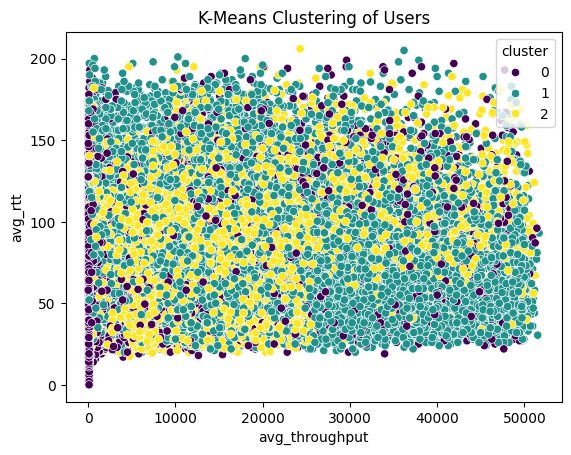

In [52]:
# Visualize the clusters
sns.scatterplot(x='avg_throughput', y='avg_rtt', hue='cluster', data=experience_metrics, palette='viridis')
plt.title('K-Means Clustering of Users')
plt.show()